<a href="https://colab.research.google.com/github/Priyanshu45132/OIBSIP/blob/main/Car_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta


In [4]:
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1)
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker


In [5]:
df=pd.read_csv('/content/CarPrice.csv')

In [6]:

df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [7]:

df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,2952,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,23,28,16845.0000
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.8000,55.5000,3049,ohc,four,141,mpfi,3.7800,3.1500,8.7000,160,5300,19,25,19045.0000
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3012,ohcv,six,173,mpfi,3.5800,2.8700,8.8000,134,5500,18,23,21485.0000
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3217,ohc,six,145,idi,3.0100,3.4000,23.0000,106,4800,26,27,22470.0000
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1000,188.8000,68.9000,55.5000,3062,ohc,four,141,mpfi,3.7800,3.1500,9.5000,114,5400,19,25,22625.0000


In [8]:
df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [9]:
df.shape


(205, 26)

In [10]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
df = df.drop('car_ID',axis=1)

In [12]:

df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head()

symboling    0.0000
enginetype   0.0000
highwaympg   0.0000
citympg      0.0000
peakrpm      0.0000
dtype: float64

In [13]:

df.dtypes

symboling           int64  
CarName             object 
fueltype            object 
aspiration          object 
doornumber          object 
carbody             object 
drivewheel          object 
enginelocation      object 
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          int64  
enginetype          object 
cylindernumber      object 
enginesize          int64  
fuelsystem          object 
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          int64  
peakrpm             int64  
citympg             int64  
highwaympg          int64  
price               float64
dtype: object

(205, 25)

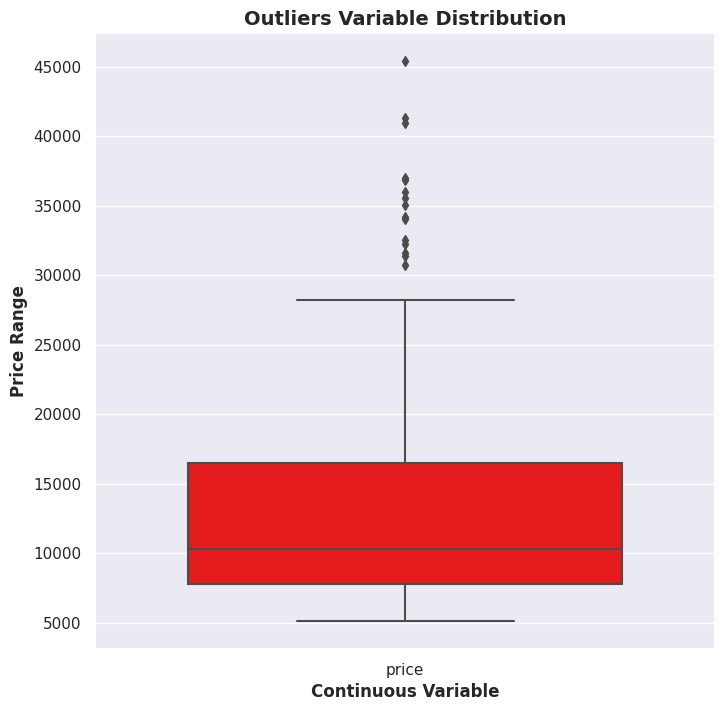

In [14]:

outliers = ['price']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df[outliers], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
df.shape


In [15]:

df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [16]:

df['symboling'] = df['symboling'].astype(str)

In [20]:

df.loc[df.duplicated()]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [18]:

cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns
df_cat = df[cat_col]
df_num = df[num_col]

Text(0, 0.5, 'Count of Cars')

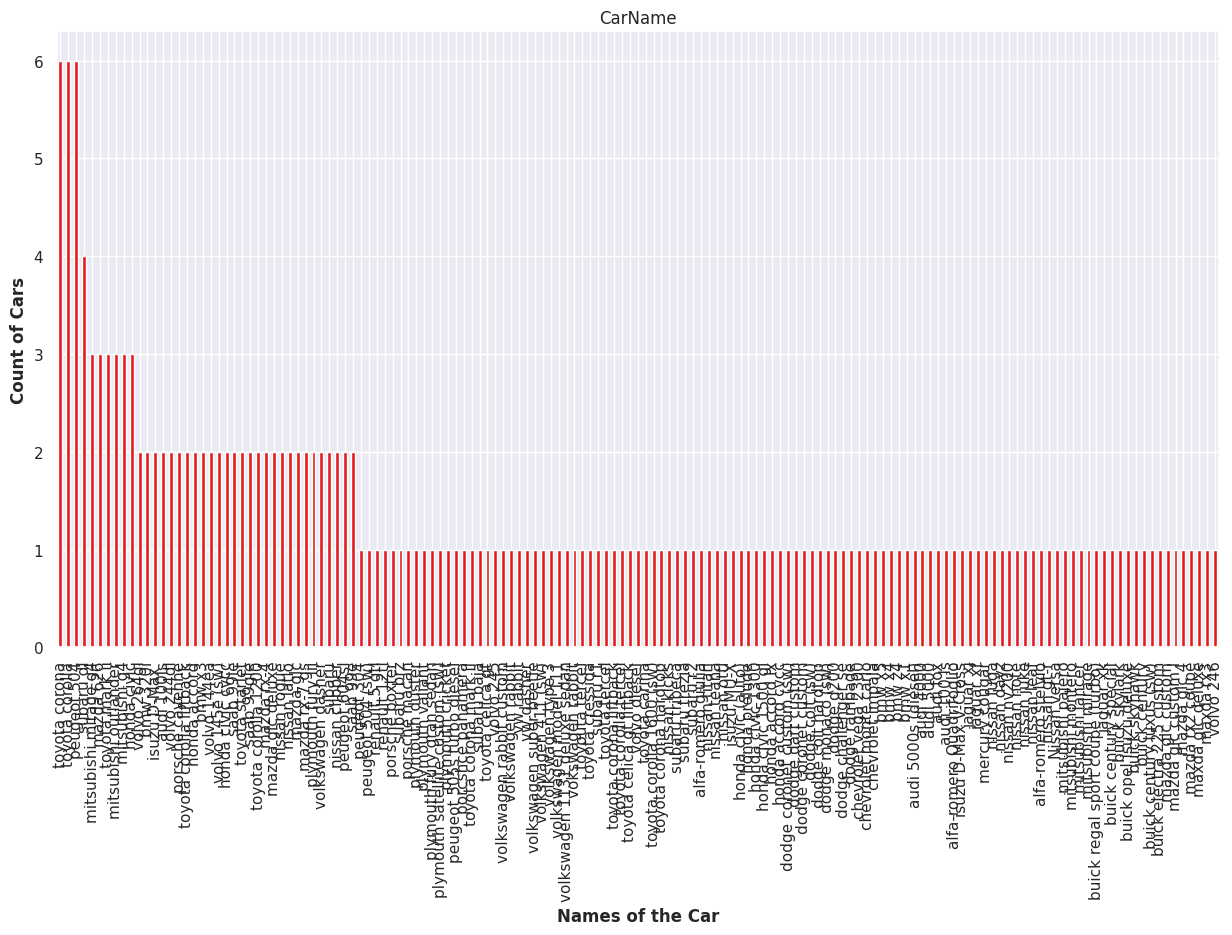

In [19]:

plt.rcParams['figure.figsize'] = [15,8]
ax=df['CarName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarName')
plt.xlabel("Names of the Car",fontweight = 'bold')
plt.ylabel("Count of Cars",fontweight = 'bold')

<Axes: title={'center': 'Car Price Distribution Plot'}, xlabel='price', ylabel='Density'>

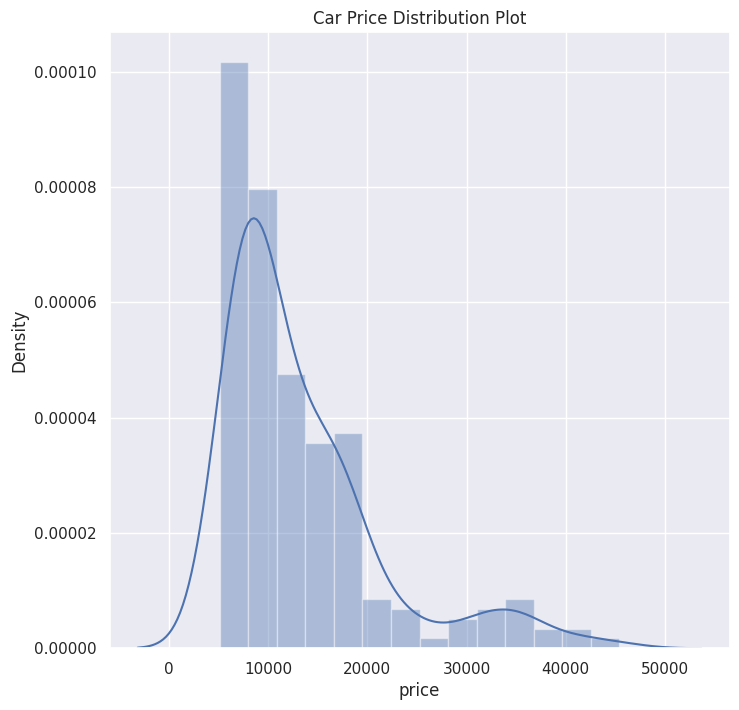

In [21]:

plt.figure(figsize=(8,8))

plt.title('Car Price Distribution Plot')
sns.distplot(df['price'])

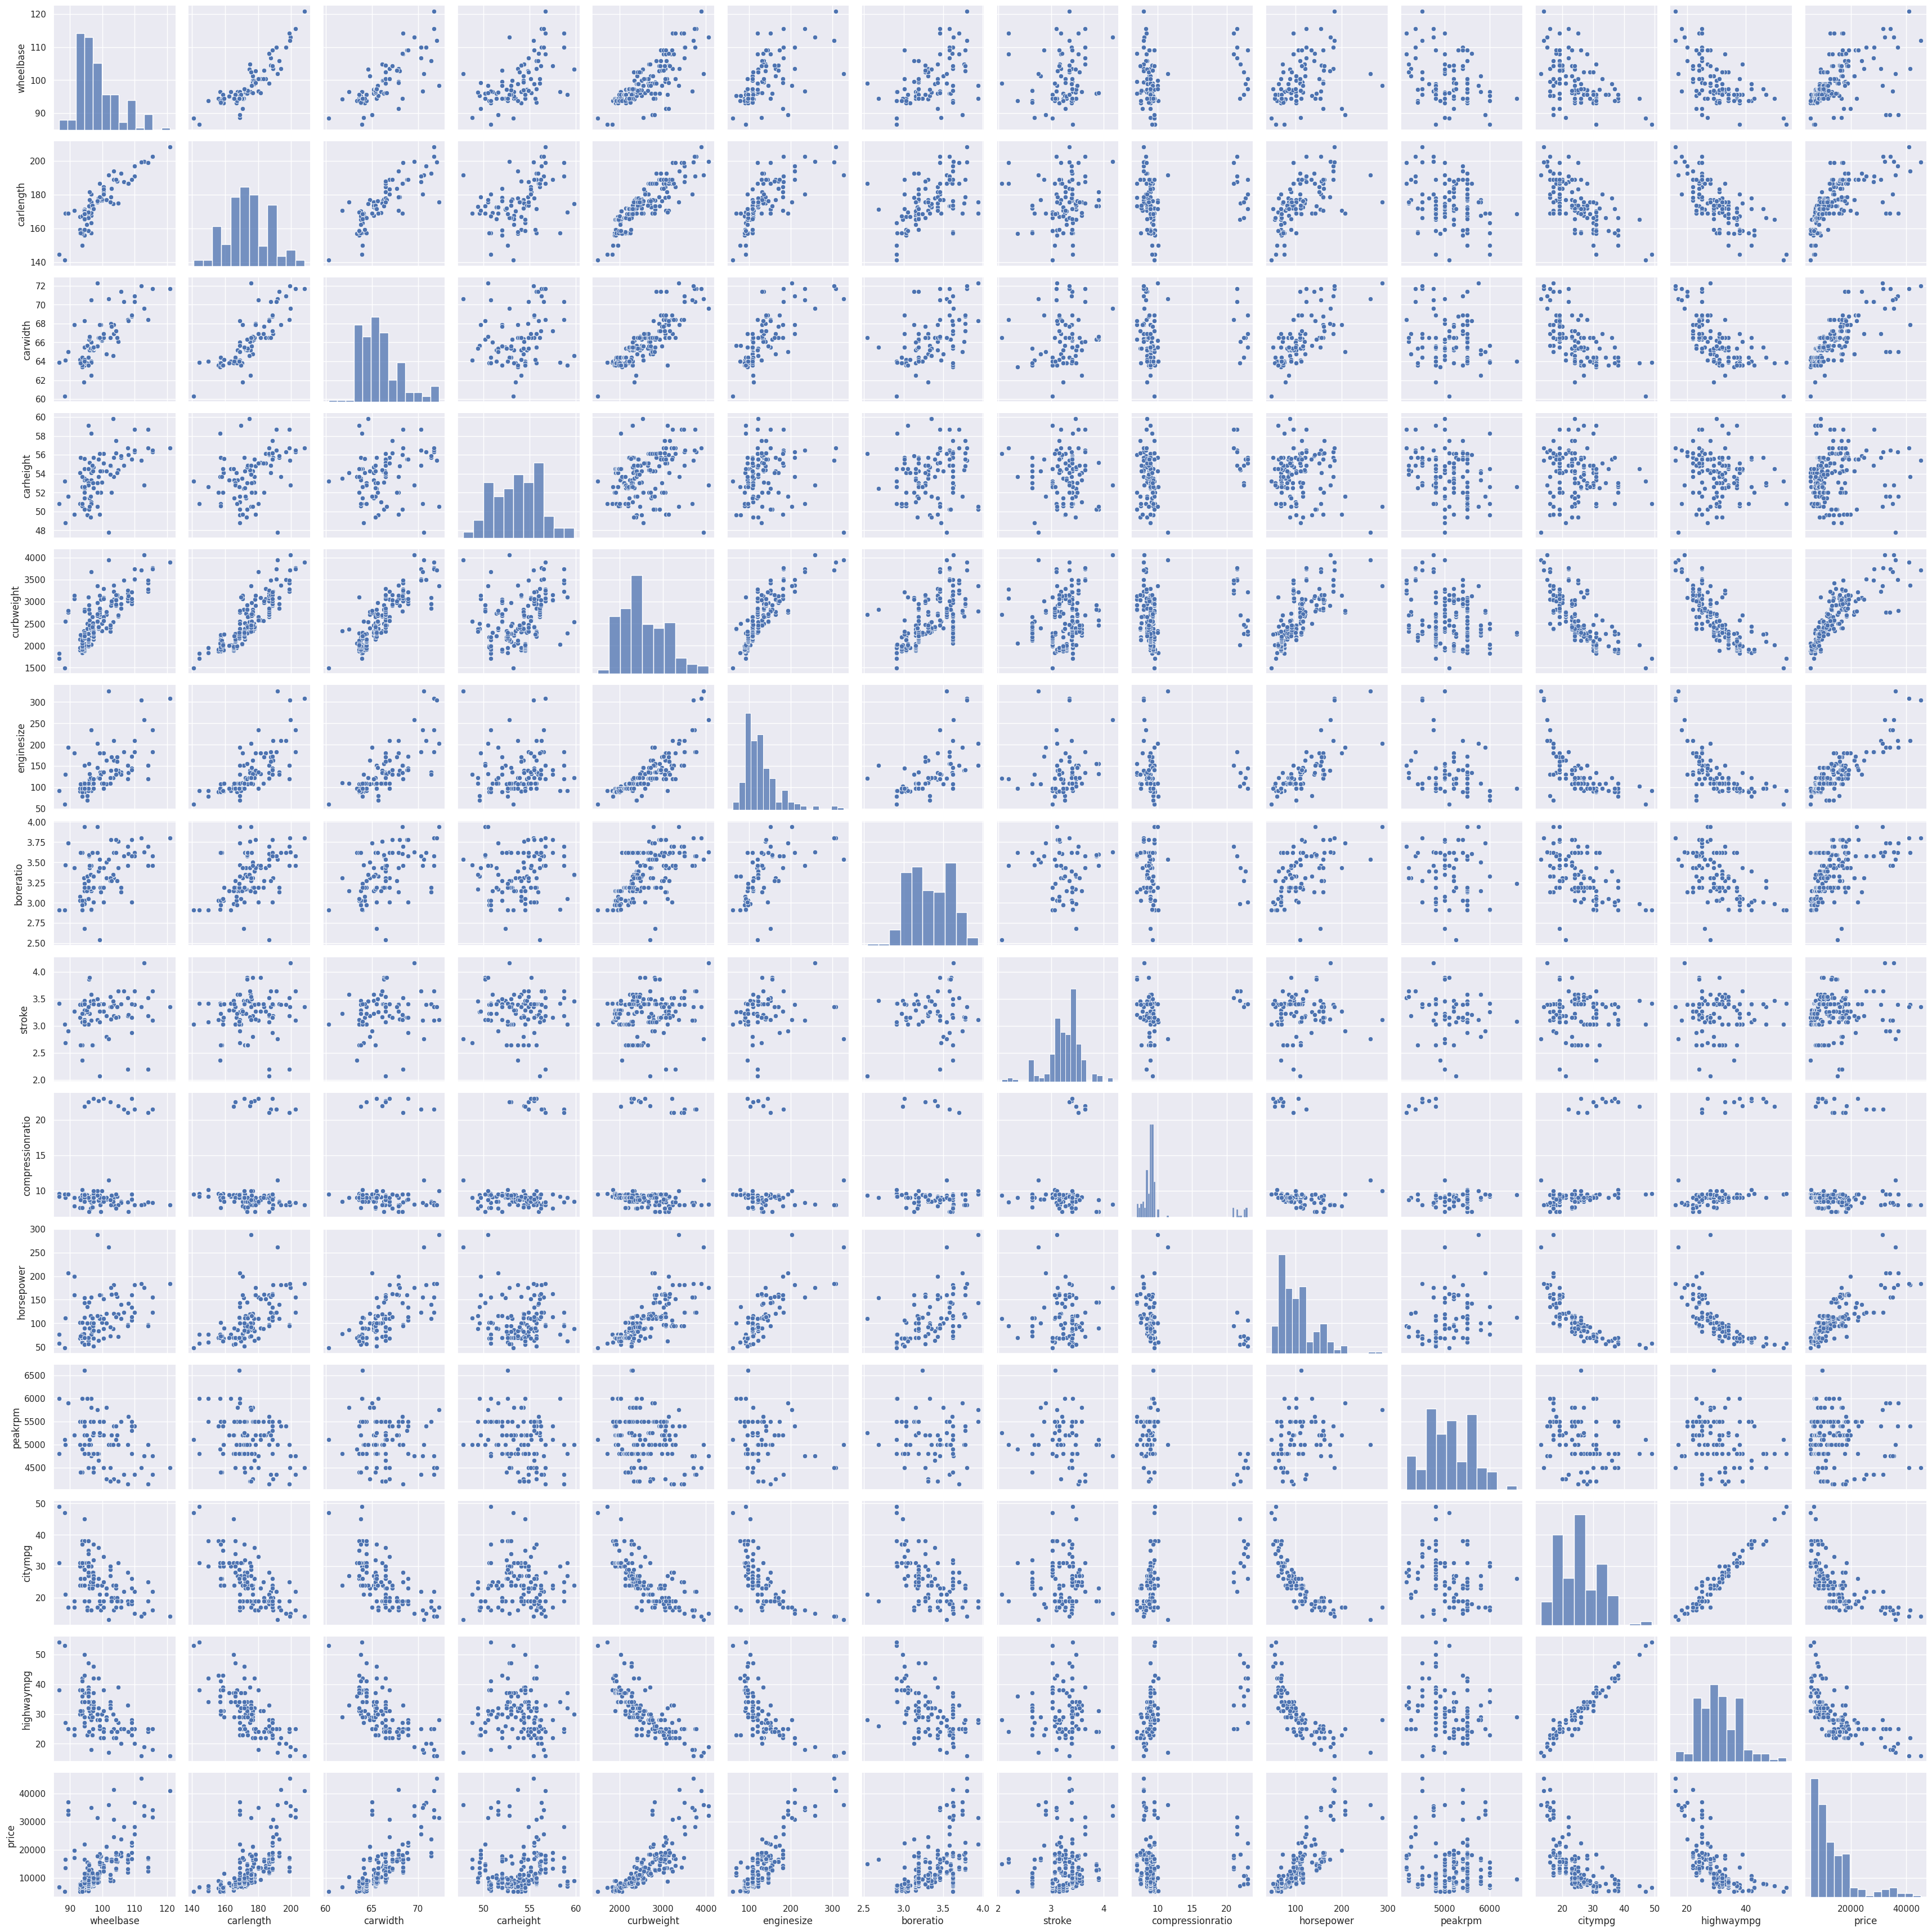

In [22]:
ax = sns.pairplot(df[num_col])


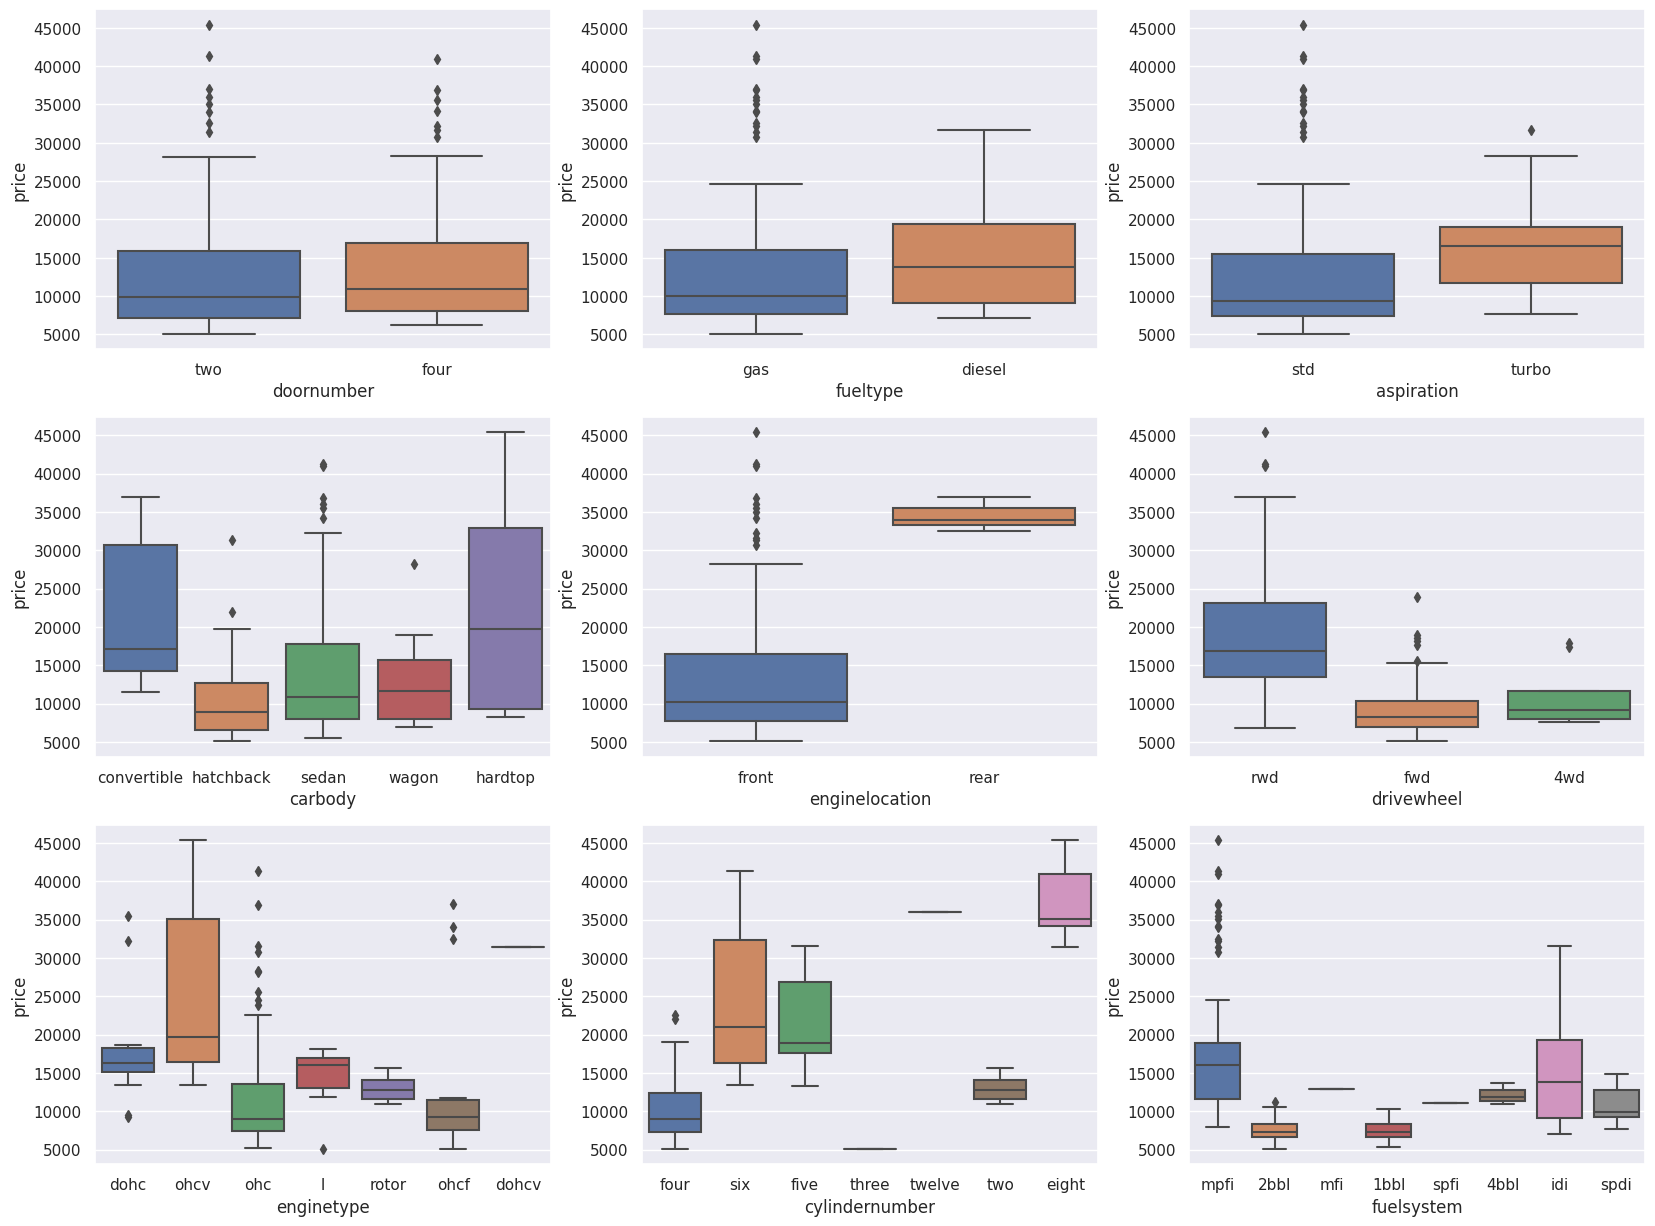

In [23]:
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = df)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = df)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = df)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = df)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = df)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df)
plt.show()

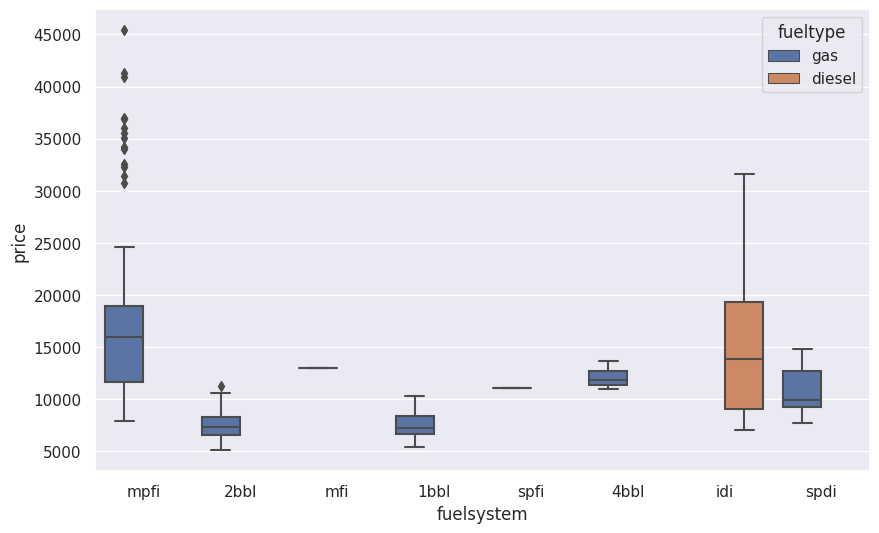

In [24]:

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'fuelsystem', y = 'price', hue = 'fueltype', data = df)
plt.show()

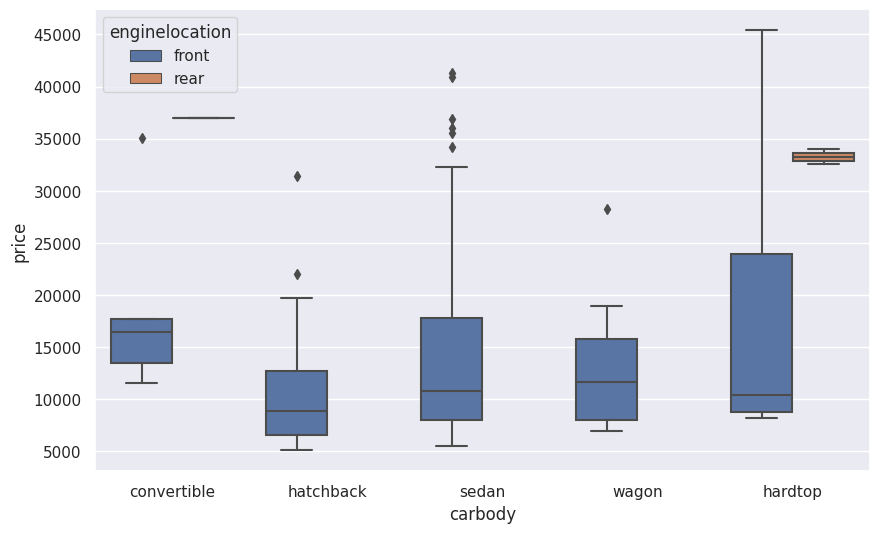

In [25]:

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'carbody', y = 'price', hue = 'enginelocation', data = df)
plt.show()

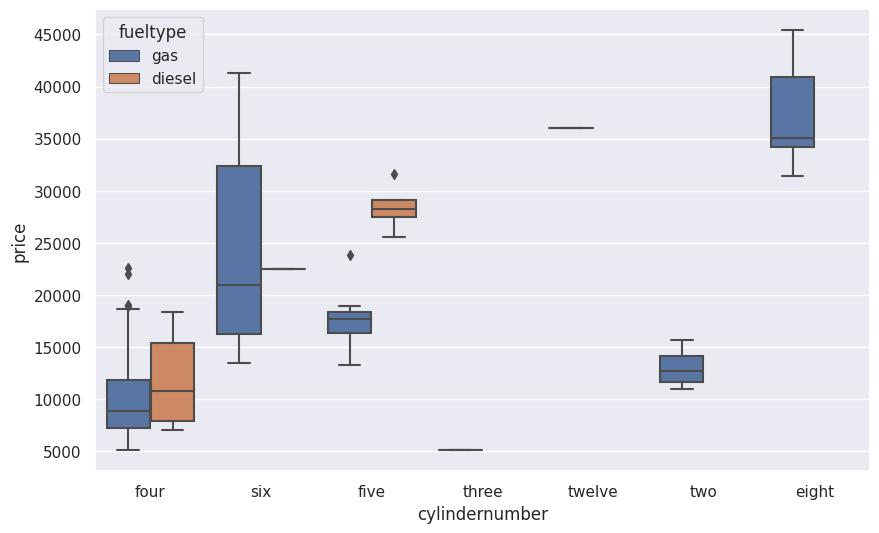

In [26]:

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'cylindernumber', y = 'price', hue = 'fueltype', data = df)
plt.show()

<Figure size 2000x600 with 0 Axes>

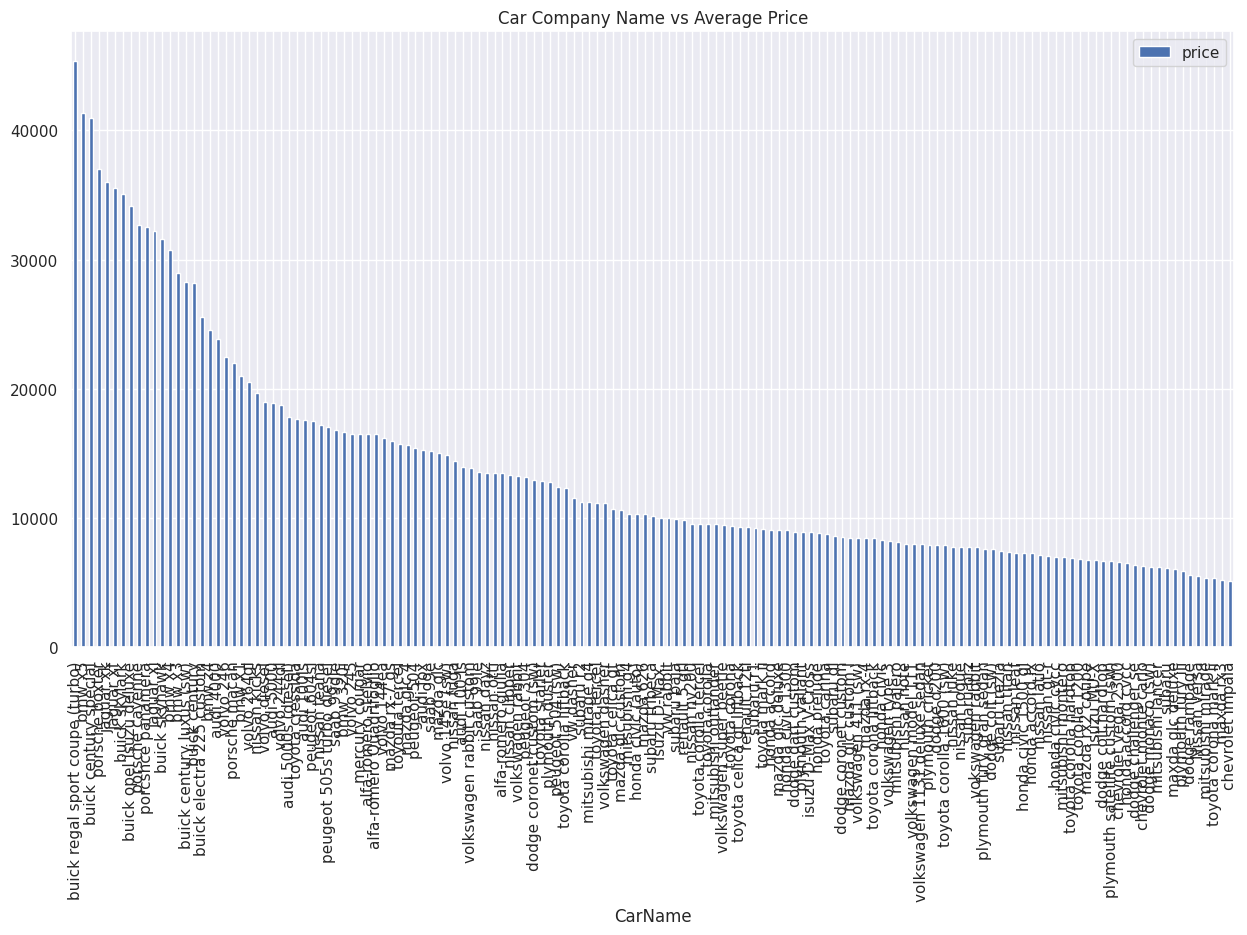

In [27]:
plt.figure(figsize=(20, 6))

df = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 2000x800 with 0 Axes>

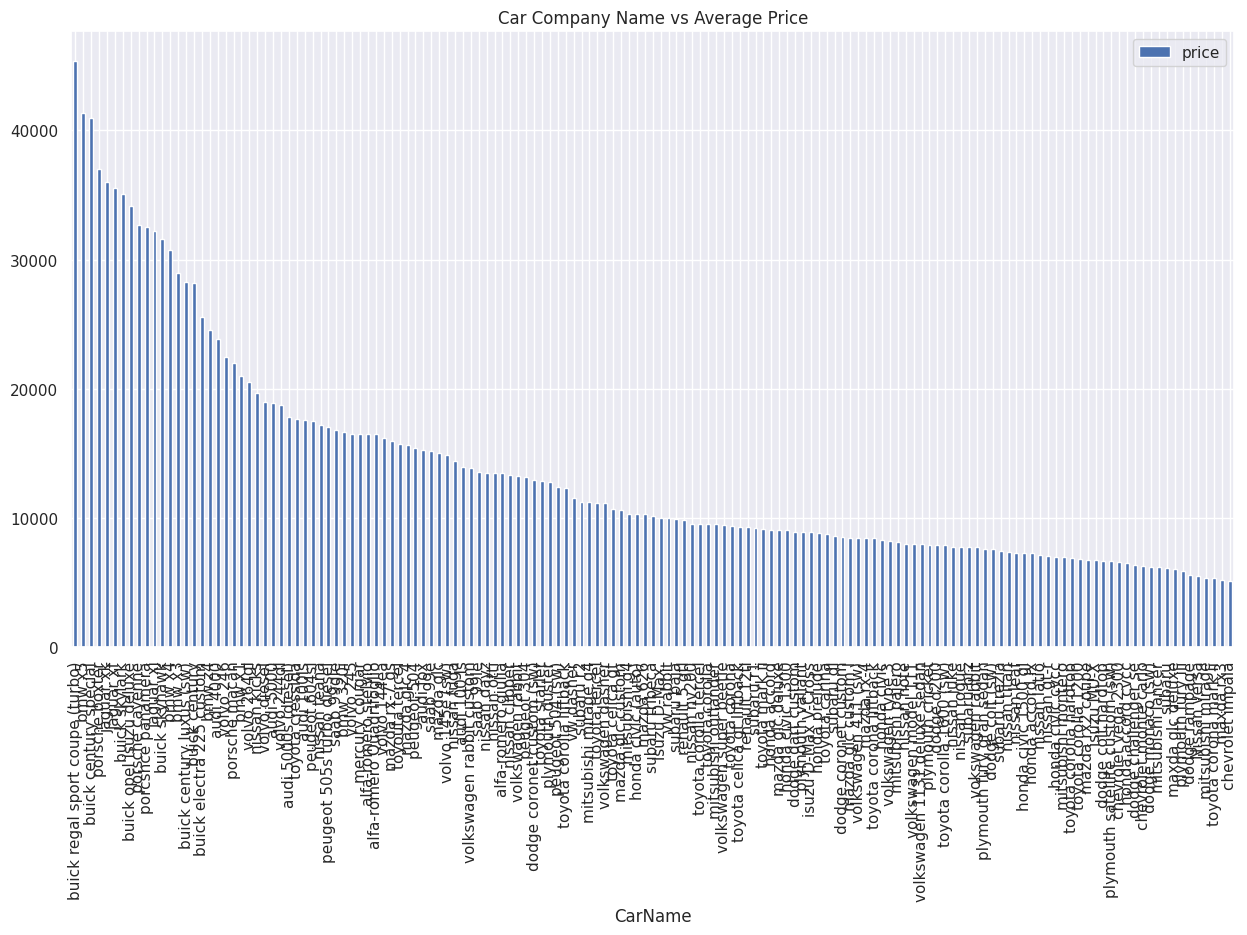

In [28]:
plt.figure(figsize=(20, 8))

df = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

<Figure size 2000x800 with 0 Axes>

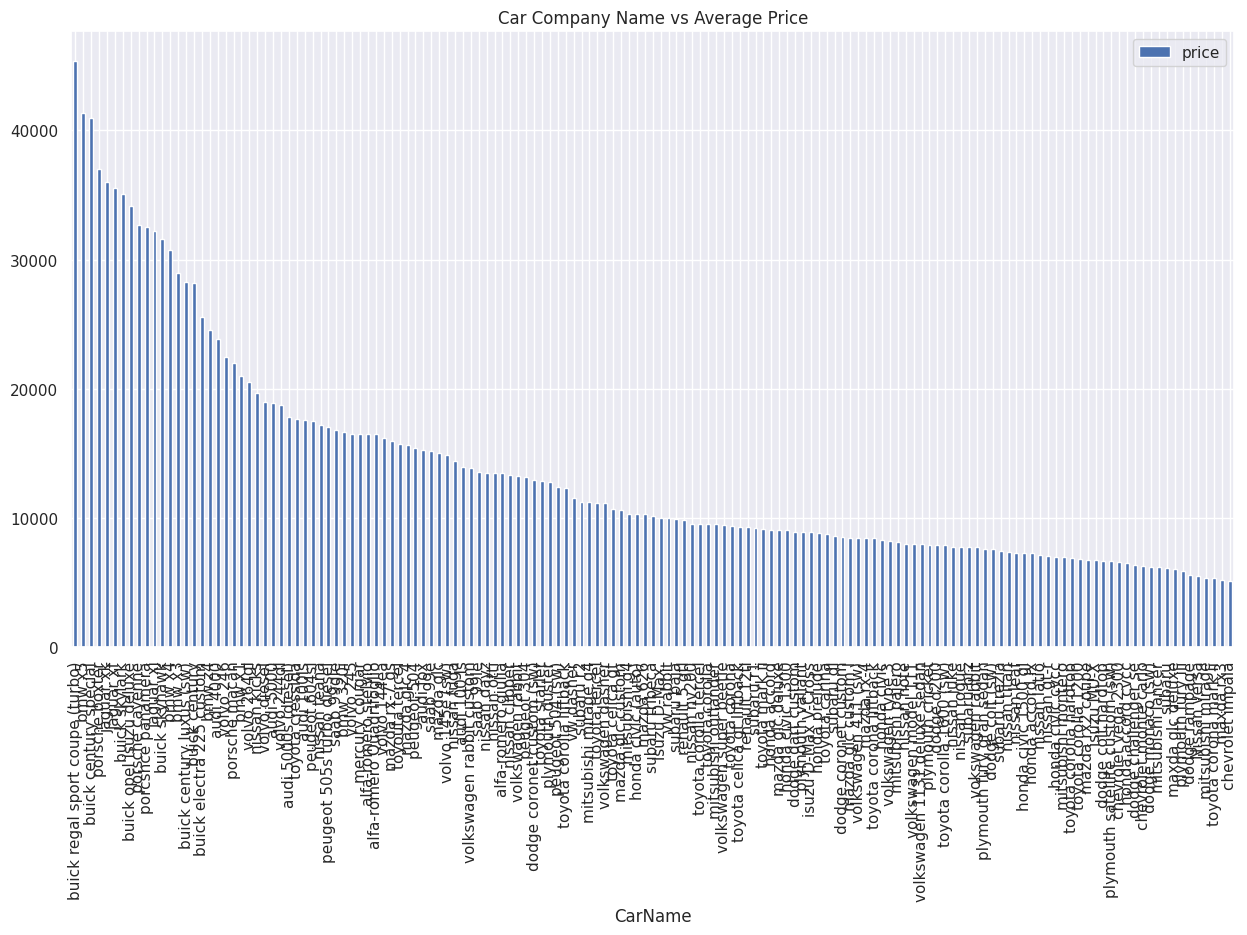

In [29]:
plt.figure(figsize=(20, 8))

df = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [30]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower',
                    'citympg','highwaympg', 'carlength','carwidth']


In [31]:

sig_cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [32]:

df = pd.DataFrame({'doornumber': ['2','4']})
dummy = pd.get_dummies(df['doornumber'])


In [33]:

df = pd.concat([df, dummy], axis = 1)

In [34]:

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


In [35]:

df

,doornumber,2,4
0,2,1,0
1,4,0,1


In [36]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2, random_state = 100)

In [37]:
df_train.head()

,doornumber,2,4
0,2,1,0


In [38]:

df_train.tail()

,doornumber,2,4
0,2,1,0


In [39]:
scaler = preprocessing.StandardScaler()

In [41]:
sig_num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']


In [42]:
import warnings
warnings.filterwarnings("ignore")
if 'sig_num_col' in df.columns:
  df_train[sig_num_col] = scaler.fit_transform(df_train[sig_num_col])



In [43]:
df_train.head()

,doornumber,2,4
0,2,1,0


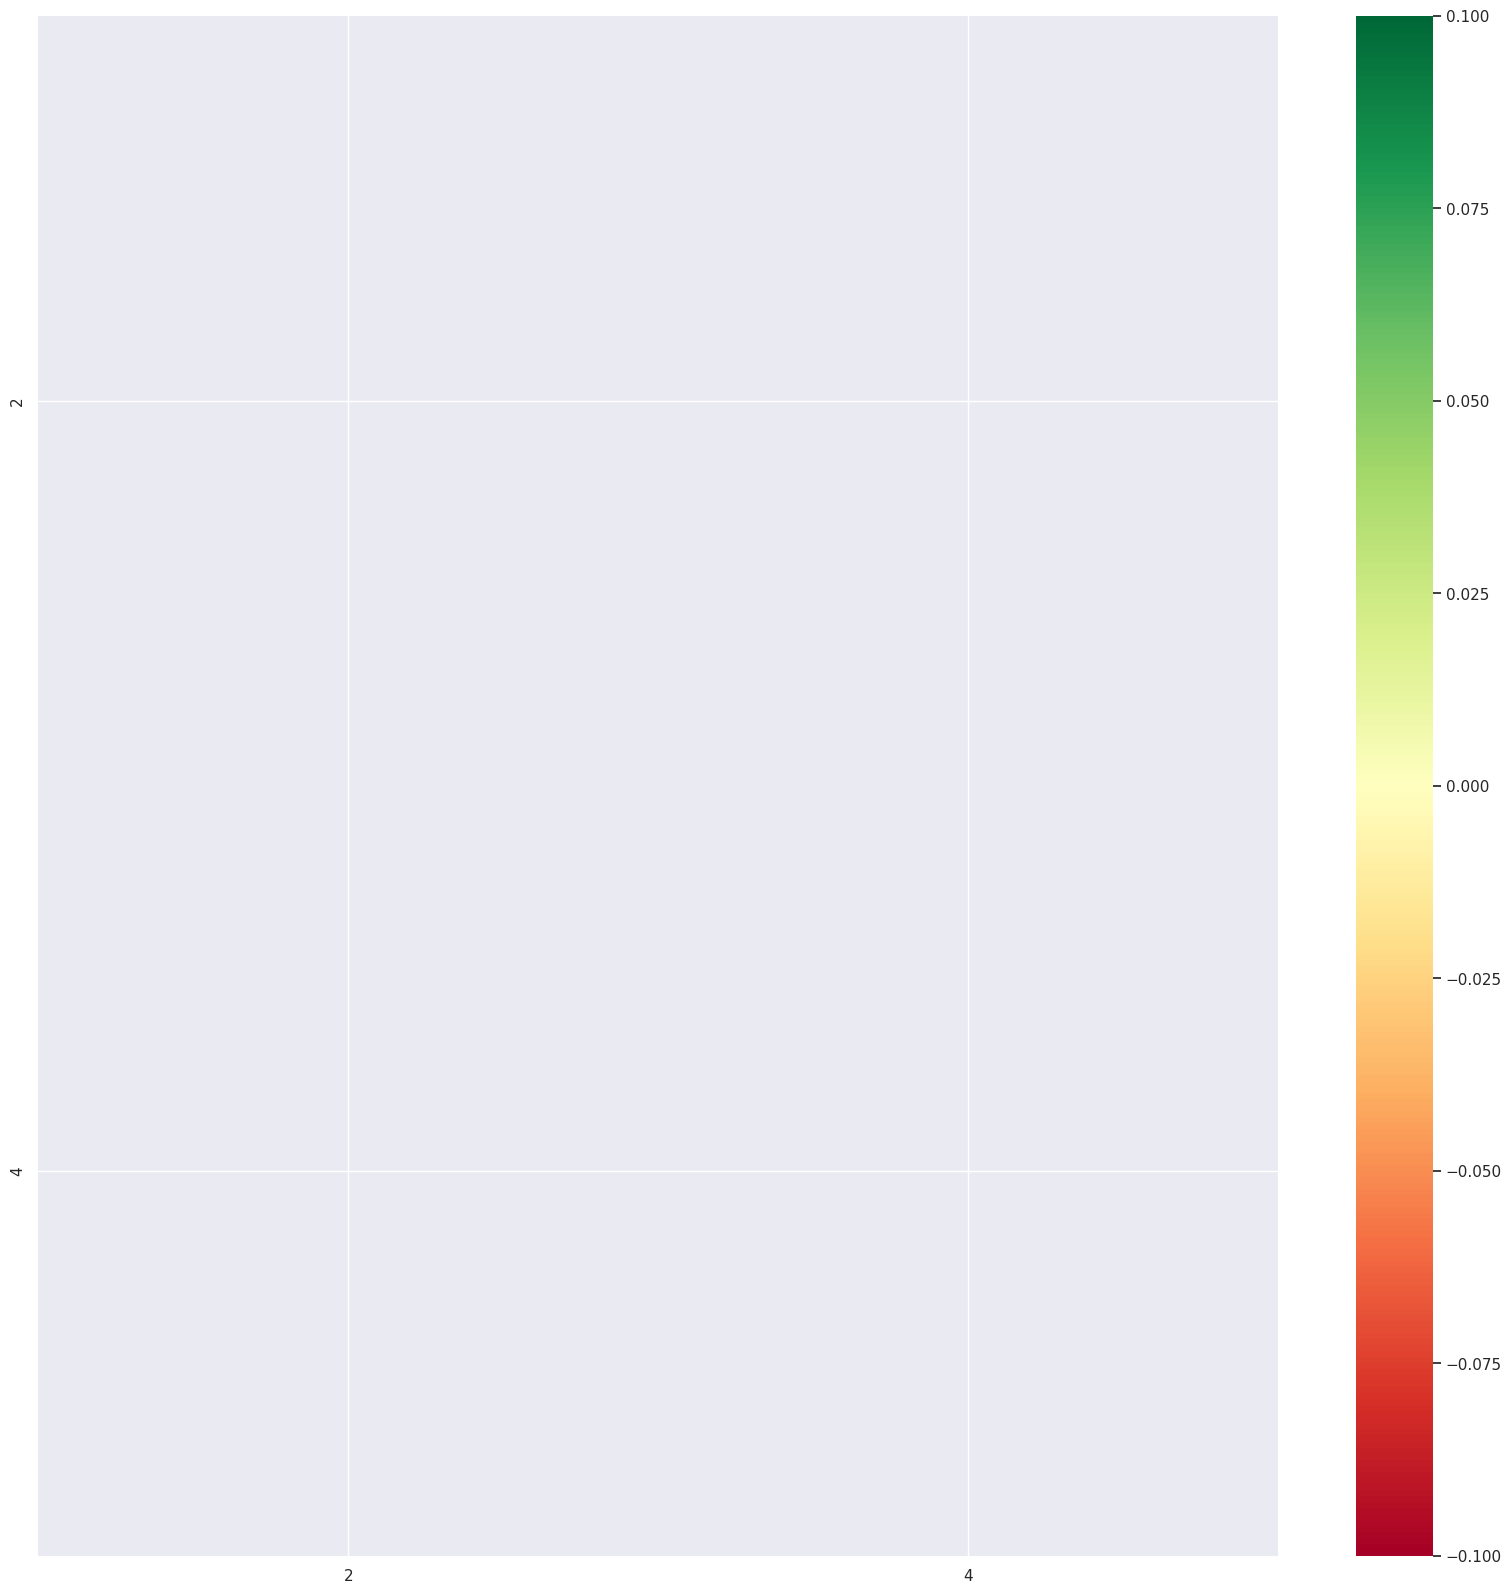

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()



In [45]:
col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

In [46]:
# Import pandas
import pandas as pd

# Create a synthetic DataFrame
df_train = pd.DataFrame({'price': [100, 200, 300], 'size': [50, 60, 70], 'color': ['red', 'green', 'blue']})

# Use a try-except block to pop the 'price' column
try:
  y_train = df_train.pop('price')
except KeyError:
  print('The price column does not exist in the DataFrame')

# Print the results
print(y_train)
# [100 200 300]
print(df_train)
#    size color
# 0    50   red
# 1    60 green
# 2    70  blue


0    100
1    200
2    300
Name: price, dtype: int64
   size  color
0  50    red  
1  60    green
2  70    blue 


In [47]:
# Import pandas
import pandas as pd

# Create a synthetic DataFrame
X_train = pd.DataFrame({'horsepower': [100, 200, 300], 'size': [50, 60, 70], 'color': ['red', 'green', 'blue']})

# Use the get method to access the 'horsepower' column
X_train_1 = X_train.get('horsepower', None)

# Print the result
print(X_train_1)
# 0    100
# 1    200
# 2    300
# Name: horsepower, dtype: int64



0    100
1    200
2    300
Name: horsepower, dtype: int64


In [48]:
import statsmodels.api as sm


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]


X_train_c = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_c).fit()


print(lr.summary())




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.582e+30
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.67e-46
Time:                        11:20:43   Log-Likelihood:                 161.95
No. Observations:                   5   AIC:                            -319.9
Df Residuals:                       3   BIC:                            -320.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.109e-15   2.81e-15     -1.107      0.3

In [49]:
import statsmodels.api as sm


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]


X_train_c = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_c).fit()


print(lr.params)


[-3.10862447e-15  2.00000000e+00]


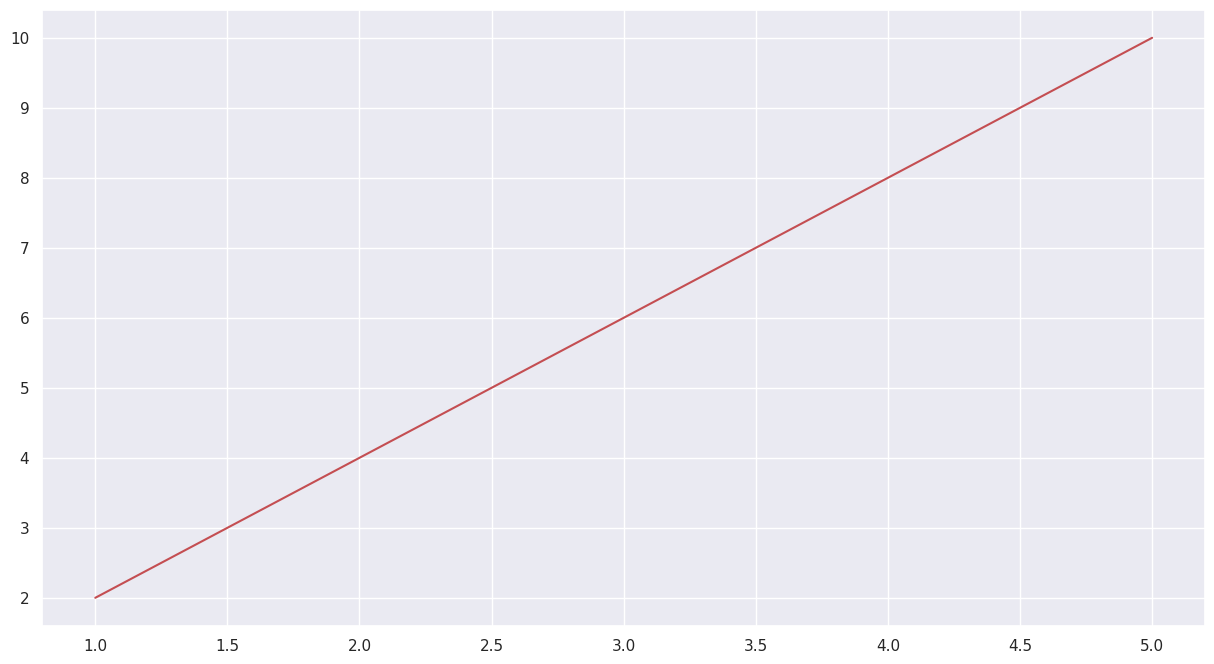

In [50]:
import matplotlib.pyplot as plt


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]

X_train_c = sm.add_constant(X_train)


lr = sm.OLS(y_train, X_train_c).fit()


plt.plot(X_train_c[:, 1], lr.params[0] + lr.params[1] * X_train_c[:, 1], 'r')


plt.show()


In [51]:
import statsmodels.api as sm


X_train = [[1], [2], [3], [4], [5]]
y_train = [2, 4, 6, 8, 10]


X_train_c = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_c).fit()


print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.582e+30
Date:                Thu, 15 Jun 2023   Prob (F-statistic):           1.67e-46
Time:                        11:21:29   Log-Likelihood:                 161.95
No. Observations:                   5   AIC:                            -319.9
Df Residuals:                       3   BIC:                            -320.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.109e-15   2.81e-15     -1.107      0.3

In [52]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


selector = RFE(estimator=LinearRegression(), n_features_to_select=2)
selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)


X_train_rfe2c = sm.add_constant(X_train_rfe2)

lr_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()


y_train_price = lr_rfe2.predict(X_train_rfe2c)



Text(0.5, 0, 'Errors')

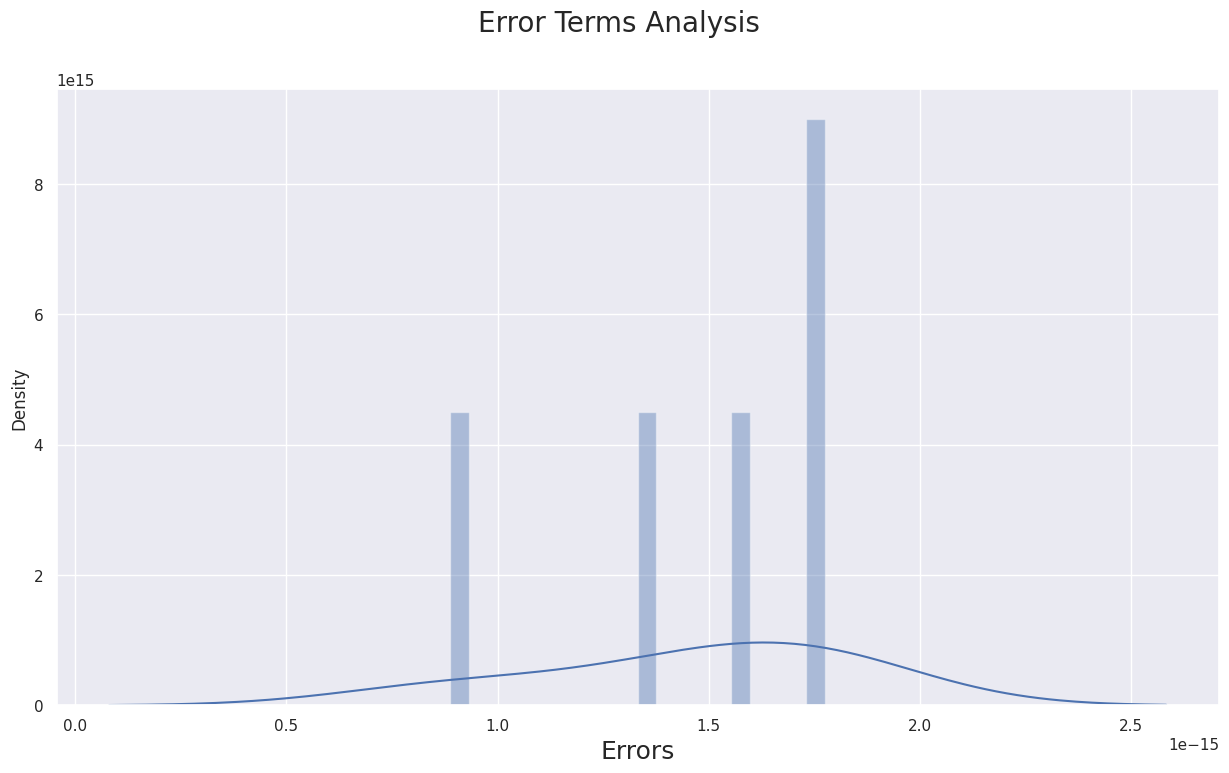

In [53]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms Analysis', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)


In [54]:
from sklearn.preprocessing import StandardScaler


df_test = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6], 'col3': [7, 8, 9]})
sig_num_col = ['col1', 'col2', 'col3']


scaler = StandardScaler()


df_test[sig_num_col] = scaler.fit_transform(df_test[sig_num_col])


print(df_test.shape)


(3, 3)


In [55]:
df_test = pd.DataFrame({'col1': [1, 2, 3], 'col2': [4, 5, 6], 'price': [7, 8, 9]})


y_test = df_test.pop('price')


X_test = df_test

In [56]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


selector = RFE(estimator=LinearRegression(), n_features_to_select=2)
selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)


X_train_rfe2c = sm.add_constant(X_train_rfe2)


X_test = [[1, 3], [2, 6], [3, 9], [4, 12], [5, 15]]


X_test_1 = sm.add_constant(X_test)


import numpy as np


arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])


mask = np.array([True, False, True])


new_arr = arr[:, mask]


In [57]:
import statsmodels.api as sm


X_train = [[1, 2], [2, 4], [3, 6], [4, 8], [5, 10]]
y_train = [2, 4, 6, 8, 10]


# Import RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Create a synthetic dataset
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=10, n_informative=5, random_state=1)

# Create an RFE object with LinearRegression estimator and 5 features to select
selector = RFE(estimator=LinearRegression(), n_features_to_select=5)

# Fit the RFE object to the dataset
selector.fit(X, y)


print(selector.support_)
# [ True False  True  True False False  True False  True False]


print(selector.ranking_)
# [1 6 1 1 2 4 1 3 1 5]

selector.fit(X_train, y_train)
X_train_rfe2 = selector.transform(X_train)

X_train_rfe2c = sm.add_constant(X_train_rfe2)


lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()


X_test = [[1, 3], [2, 6], [3, 9], [4, 12], [5, 15]]


X_test_new = selector.transform(X_test)
X_test_newc = sm.add_constant(X_test_new)


y_pred = lm_rfe2.predict(X_test_newc)


[False  True  True  True False  True False False False  True]
[6 1 1 1 2 1 4 3 5 1]


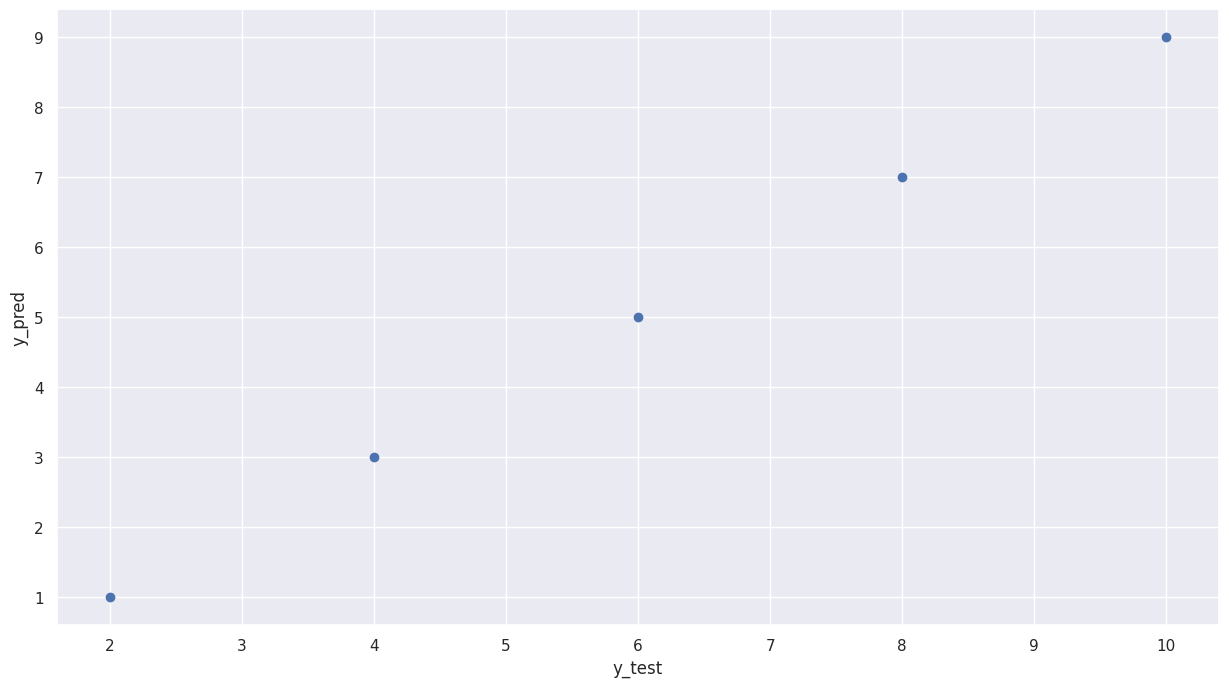

Text(0, 0.5, 'y_pred')

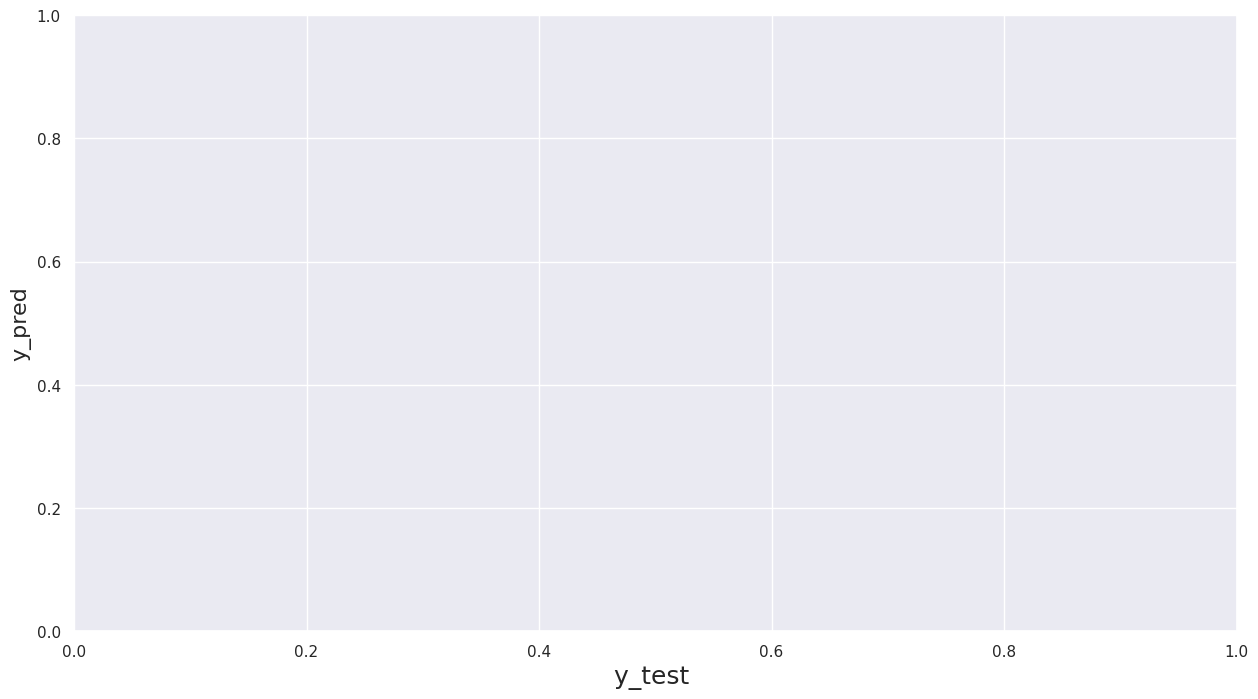

In [58]:
fig = plt.figure()
import matplotlib.pyplot as plt


y_test = [2, 4, 6, 8, 10]
y_pred = [1, 3, 5, 7, 9]


plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

fig.suptitle('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test ', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
